### PARKINSON'S DISEASE DETECTION USING VOICE RECORDINGS 
Novelty case: Generating and training on synthetic dataset

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline

In [ ]:
#import sweetviz
import sdv
import tpot
import table_evaluator
#import mrmr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, classification_report, confusion_matrix

### Exploratory Data Analysis
ORIGINAL DATABASE:

In [ ]:
df = pd.read_csv('ReplicatedAcousticFeatures-ParkinsonDatabase.csv')
df.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [ ]:
df.shape

(240, 48)

240 rows (80 subjects × 3 replications) and 44 columns (one for every voice feature) are present in the dataset.

### Methods of data collection:

ORIGINAL DATA SOURCE: <br>
Carlos J. PÃ©rez <br>
Departamento de MatemÃ¡ticas, Universidad de Extremadura, CÃ¡ceres (Spain) <br>
Email: carper '@' unex.es <br>
#### Participants:
A total of 80 subjects older than 50 years were involved in the
study. <br>
* 40 of them were healthy: 22 men (55%) and 18 women (45%)
* 40 of them were affected by PD: 27 men (67.5%) and 13 women (32.5%)

The mean ( ± standard deviation) age was 66.38 ± 8.38 for the control group and 69.58 ± 7.82 for the people with PD. <br>
PD patients presented at least two of the following symptoms: resting tremor, bradykinesia or rigidity.
#### Speech recordings
The vocal task was the sustained phonation of /a/ vowel at comfortable pitch and loudness, as constant as possible. This phonation had to be kept for at least 5 seconds and on one breath. The task was repeated three times per individual, and all of them were considered as replications. <br>
The speech data were recorded using a portable computer with an <b> external sound card (TASCAM US322) and a headband microphone (AKG 520)</b> featuring a cardiod pattern. The digital recording was performed at a <b> sampling rate of 44.1 KHz and a resolution of 16 bits/sample</b> by using <b>Audacity</b> software (release 2.0.5).

#### The columns represent the following: 
1. ID: Subjects's identifier.
2. Recording: Number of the recording.
3. Status: 0=Healthy; 1=PD
4. Gender: 0=Man; 1=Woman
5. Pitch local perturbation measures: relative jitter (Jitter_rel), absolute jitter (Jitter_abs), relative average perturbation (Jitter_RAP), and pitch perturbation quotient (Jitter_PPQ).
6. Amplitude perturbation measures: local shimmer (Shim_loc), shimmer in dB (Shim_dB), 3-point amplitude perturbation quotient (Shim_APQ3), 5-point amplitude perturbation quotient (Shim_APQ5), and 11-point amplitude perturbation quotient (Shim_APQ11).
7. Harmonic-to-noise ratio measures: harmonic-to-noise ratio in the frequency band 0-500 Hz (HNR05), in 0-1500 Hz (HNR15), in 0-2500 Hz (HNR25), in 0-3500 Hz (HNR35), and in 0-3800 Hz (HNR38).
8. Mel frequency cepstral coefficient-based spectral measures of order 0 to 12 (MFCC0, MFCC1,..., MFCC12) and their derivatives (Delta0, Delta1,..., Delta12).
9. Recurrence period density entropy (RPDE).
10. Detrended fluctuation analysis (DFA).
11. Pitch period entropy (PPE).
12. Glottal-to-noise excitation ratio (GNE).

#### Checking for null values:

In [ ]:
df.isnull().sum()

ID            0
Recording     0
Status        0
Gender        0
Jitter_rel    0
Jitter_abs    0
Jitter_RAP    0
Jitter_PPQ    0
Shim_loc      0
Shim_dB       0
Shim_APQ3     0
Shim_APQ5     0
Shi_APQ11     0
HNR05         0
HNR15         0
HNR25         0
HNR35         0
HNR38         0
RPDE          0
DFA           0
PPE           0
GNE           0
MFCC0         0
MFCC1         0
MFCC2         0
MFCC3         0
MFCC4         0
MFCC5         0
MFCC6         0
MFCC7         0
MFCC8         0
MFCC9         0
MFCC10        0
MFCC11        0
MFCC12        0
Delta0        0
Delta1        0
Delta2        0
Delta3        0
Delta4        0
Delta5        0
Delta6        0
Delta7        0
Delta8        0
Delta9        0
Delta10       0
Delta11       0
Delta12       0
dtype: int64

As seen above, no null values are present

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          240 non-null    object 
 1   Recording   240 non-null    int64  
 2   Status      240 non-null    int64  
 3   Gender      240 non-null    int64  
 4   Jitter_rel  240 non-null    float64
 5   Jitter_abs  240 non-null    float64
 6   Jitter_RAP  240 non-null    float64
 7   Jitter_PPQ  240 non-null    float64
 8   Shim_loc    240 non-null    float64
 9   Shim_dB     240 non-null    float64
 10  Shim_APQ3   240 non-null    float64
 11  Shim_APQ5   240 non-null    float64
 12  Shi_APQ11   240 non-null    float64
 13  HNR05       240 non-null    float64
 14  HNR15       240 non-null    float64
 15  HNR25       240 non-null    float64
 16  HNR35       240 non-null    float64
 17  HNR38       240 non-null    float64
 18  RPDE        240 non-null    float64
 19  DFA         240 non-null    f

### Visualizations

#### Checking for label imbalance:

AxesSubplot(0.125,0.125;0.775x0.755)


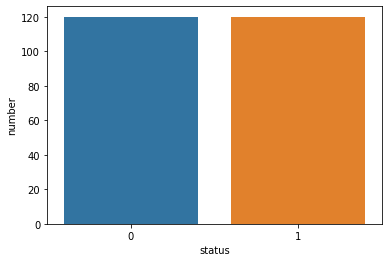

In [ ]:
temp = df["Status"].value_counts()
label_check = pd.DataFrame({'status':temp.index,'number':temp.values})
print(sns.barplot(x = 'status',y = 'number', data = label_check))

From the above plot, it can be observed that there's no label imbalance in the dataset.

#### Histogram plots:

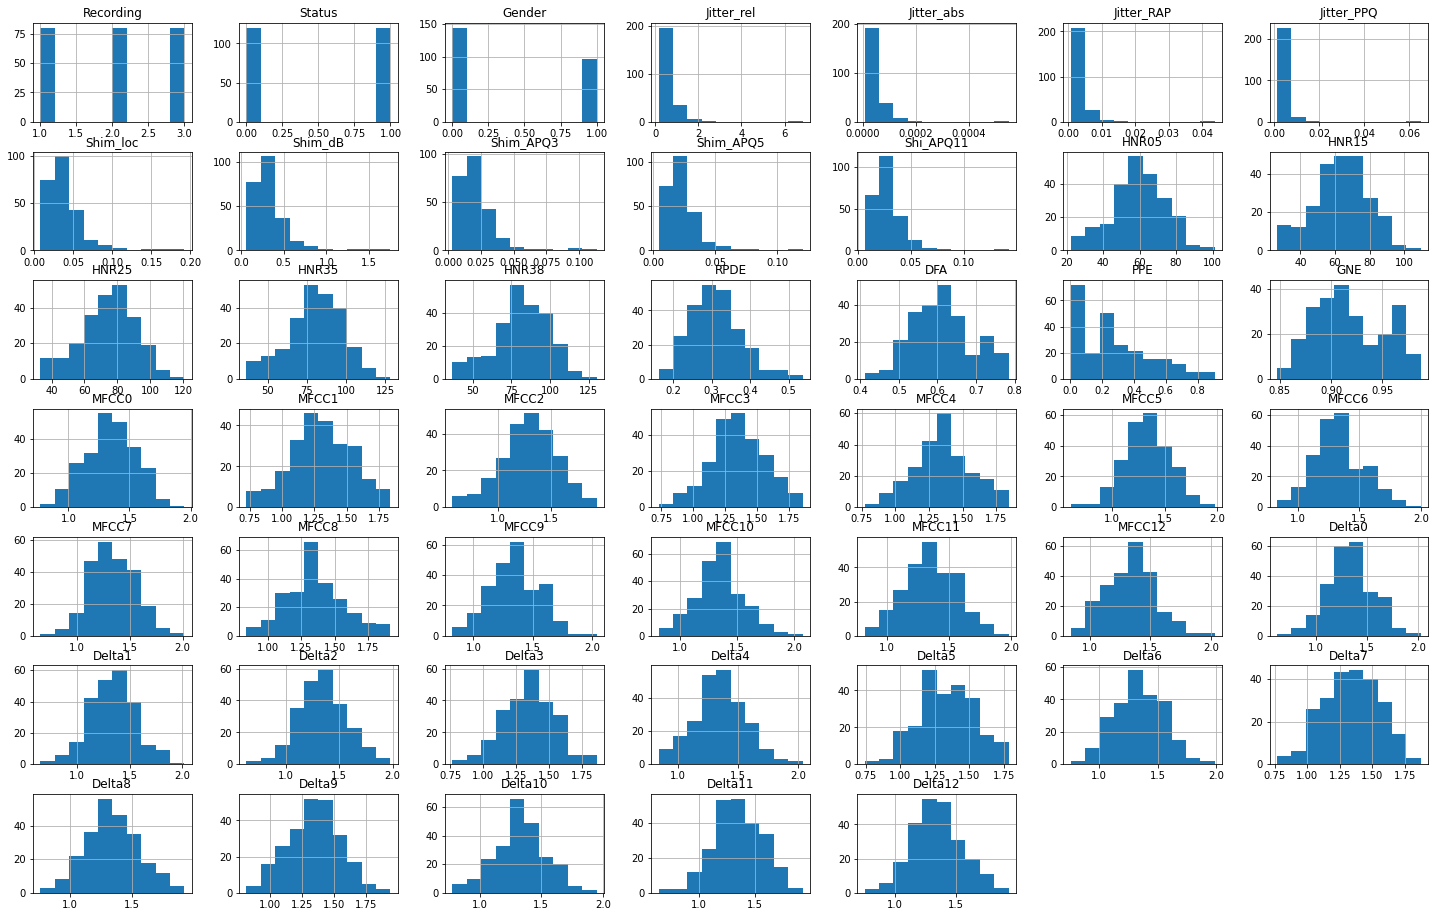

In [ ]:
df.hist(figsize= (25,16))
plt.show()

#### Bar plots:

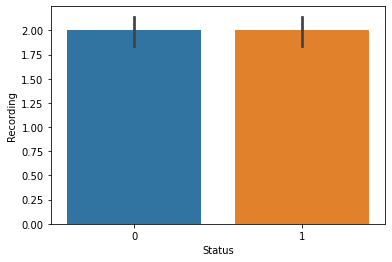

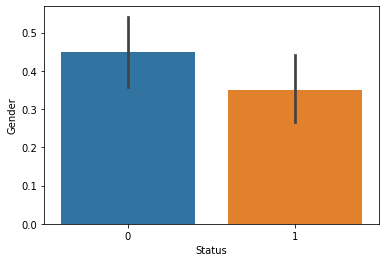

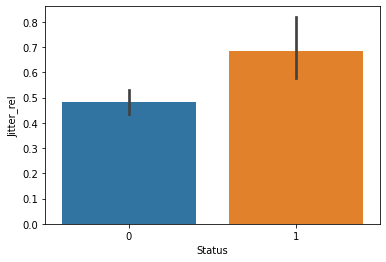

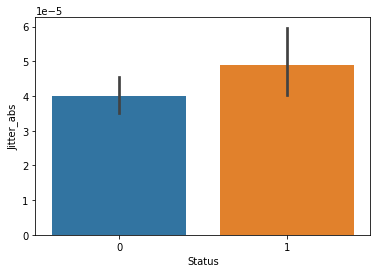

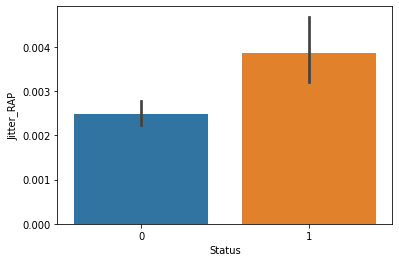

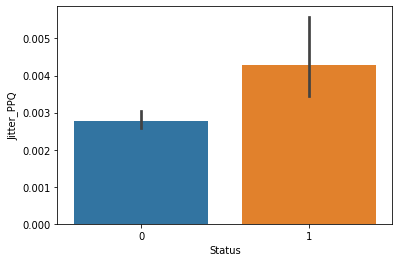

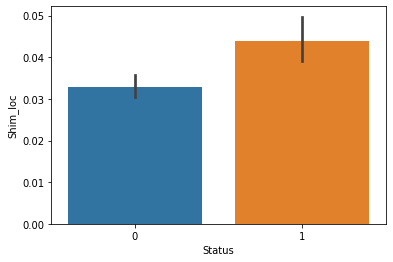

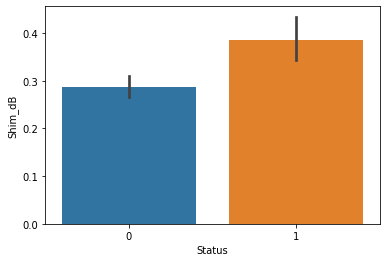

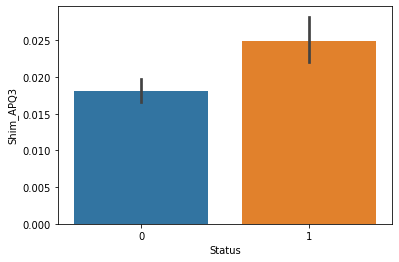

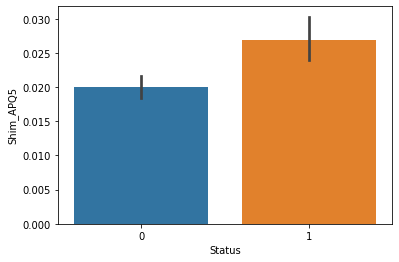

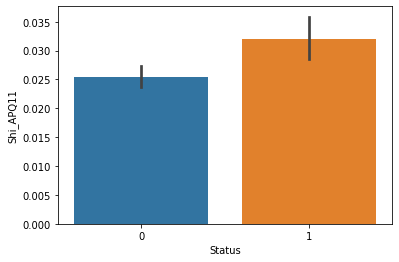

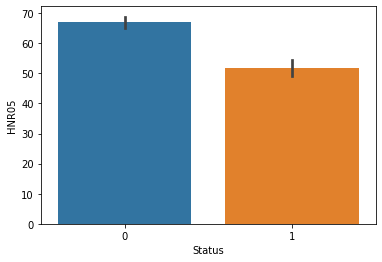

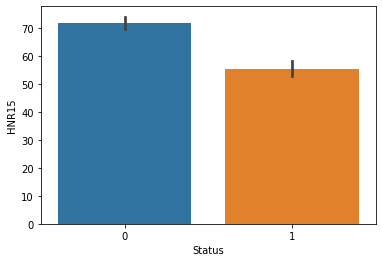

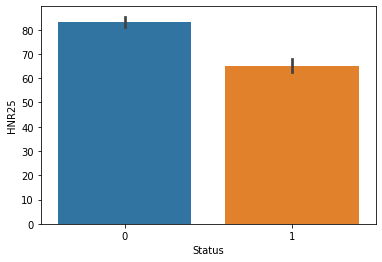

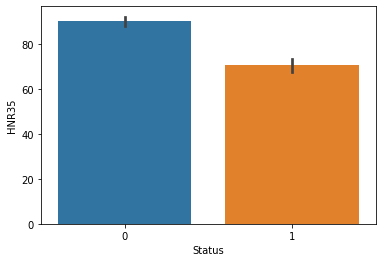

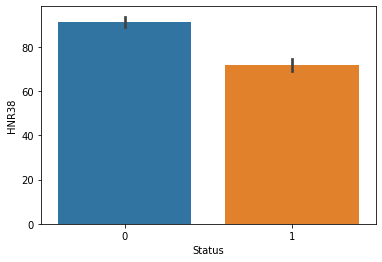

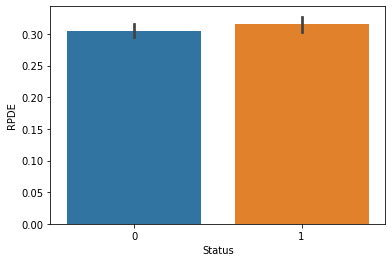

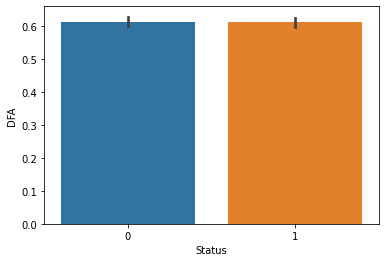

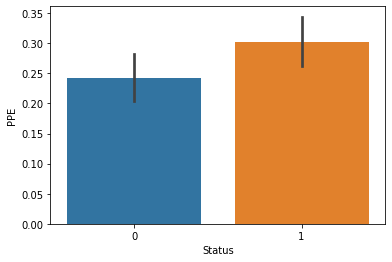

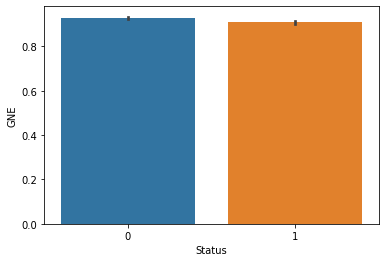

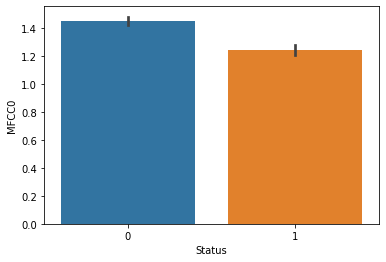

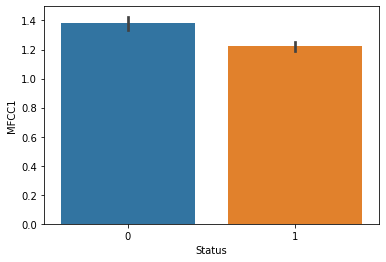

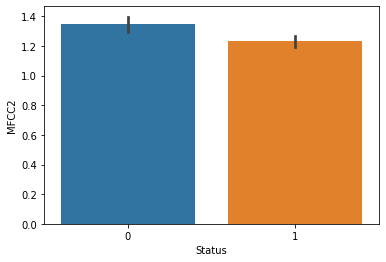

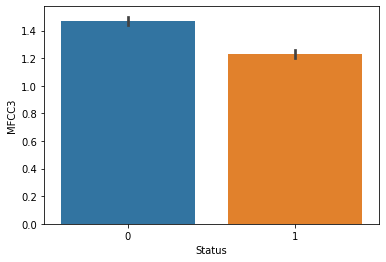

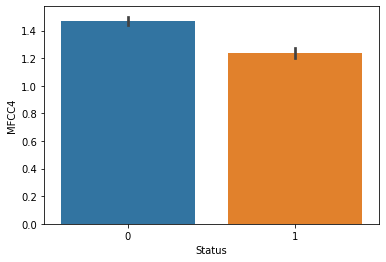

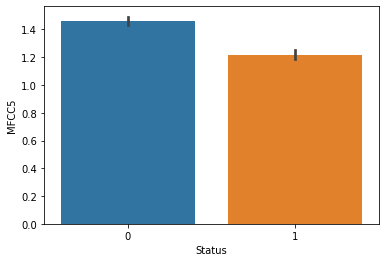

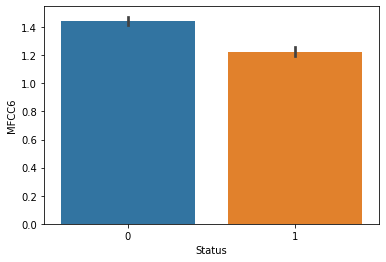

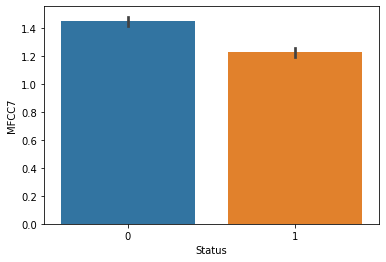

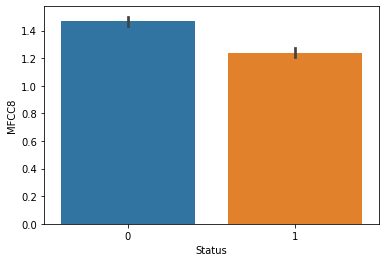

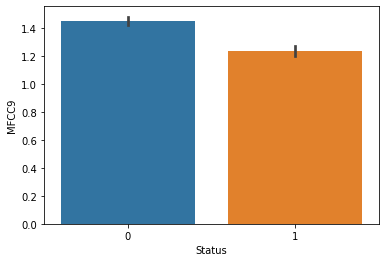

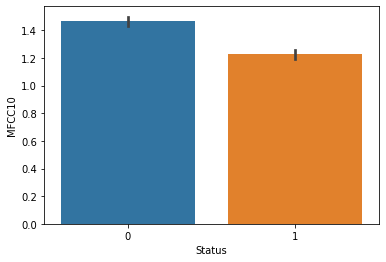

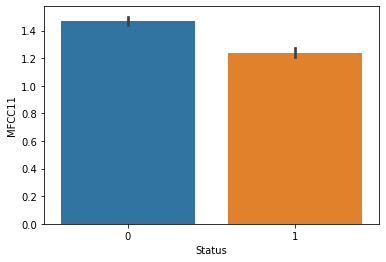

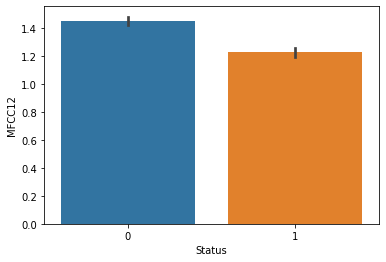

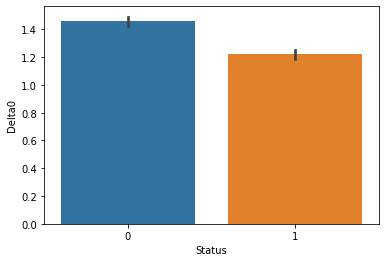

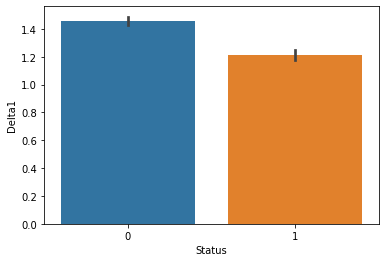

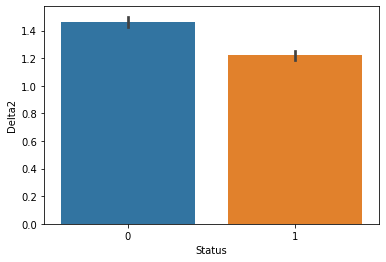

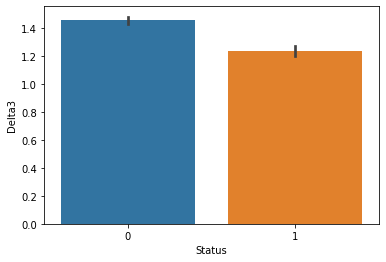

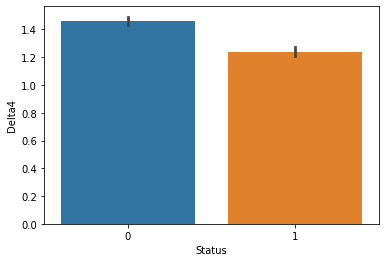

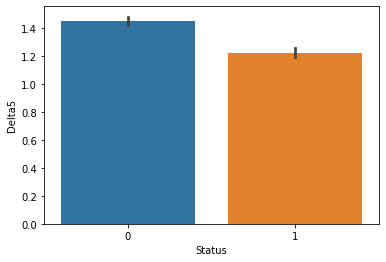

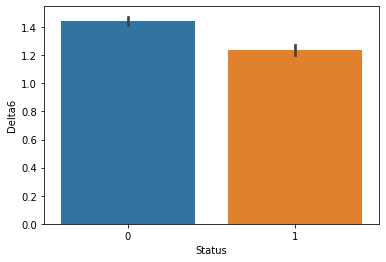

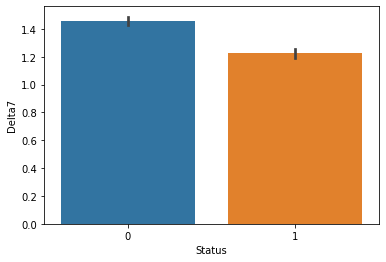

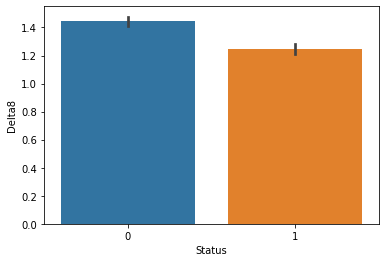

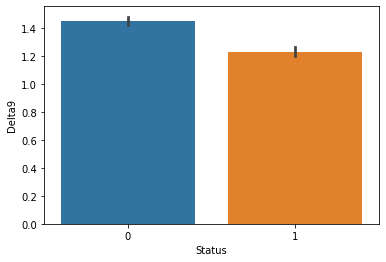

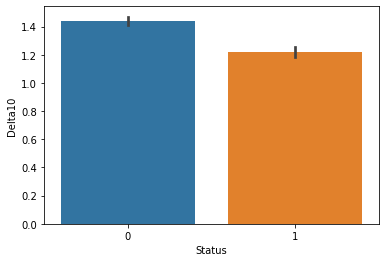

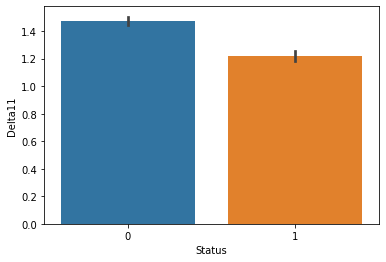

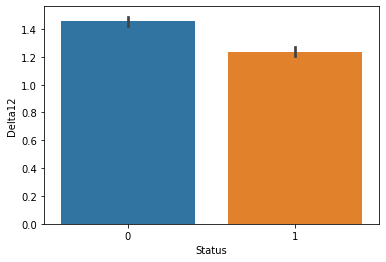

In [ ]:
def bar_plot(attr):
    sns.barplot(y = df[attr], x = df['Status'])
    plt.show()

feat = [col for col in df.columns if col not in ['ID','Status']]
for i in range(len(feat)):
    bar_plot(feat[i])

#### Gaussian distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


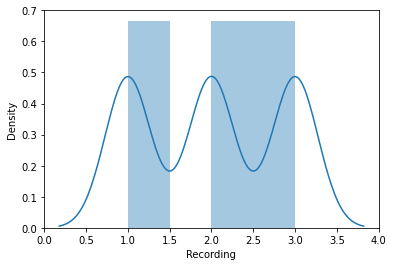

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


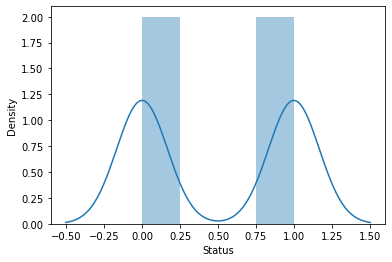

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


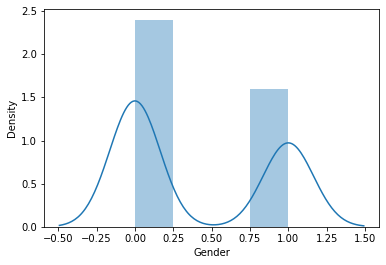

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


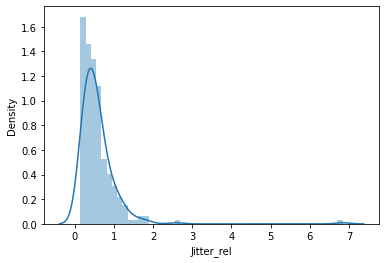

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


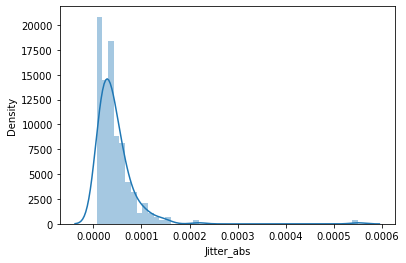

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


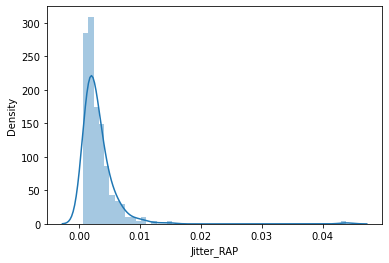

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


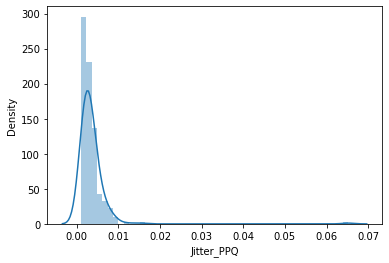

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


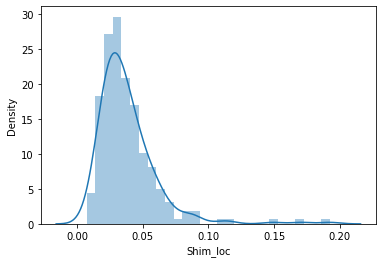

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


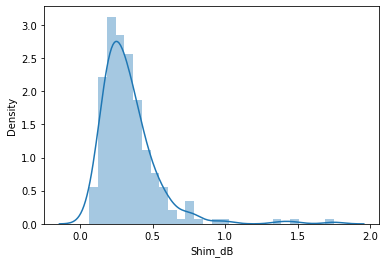

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


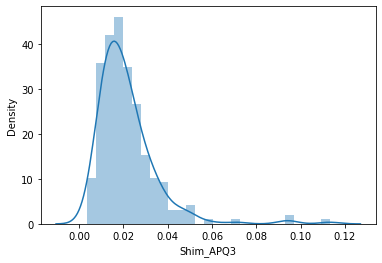

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


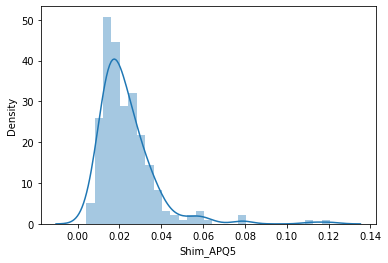

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


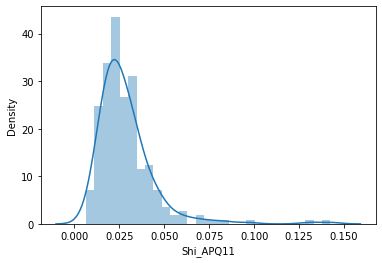

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


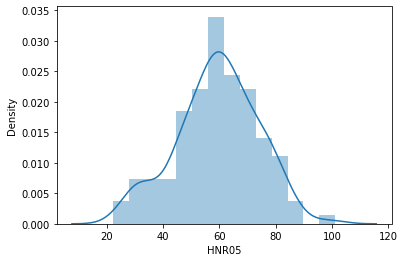

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


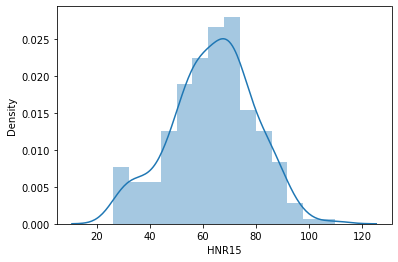

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


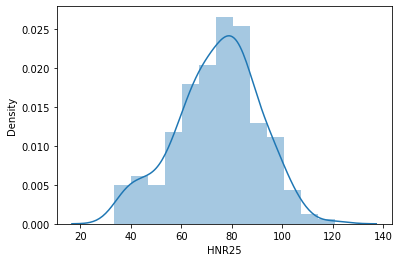

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


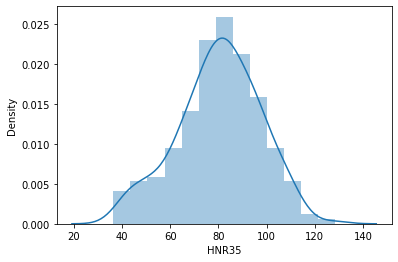

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


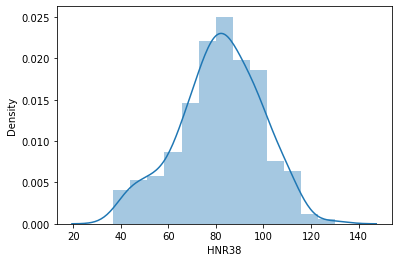

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


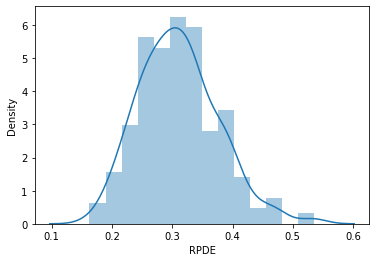

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


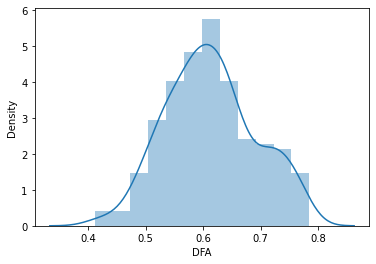

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


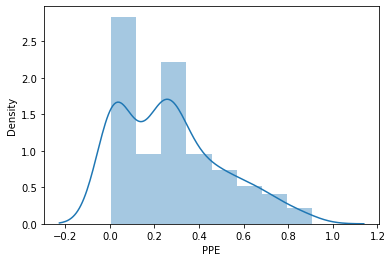

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


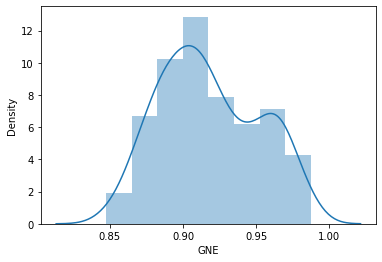

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


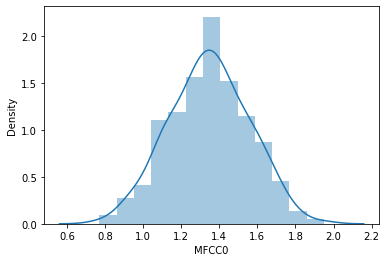

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


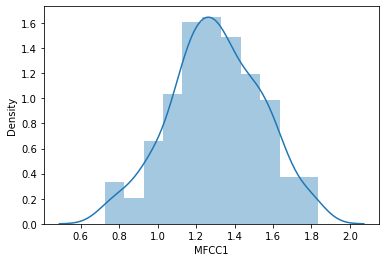

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


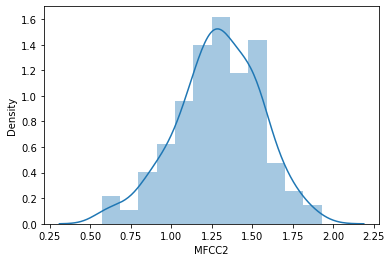

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


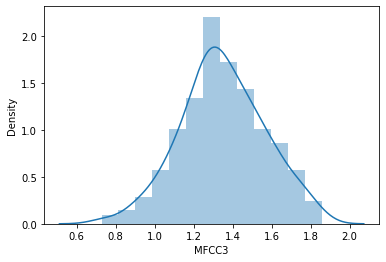

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


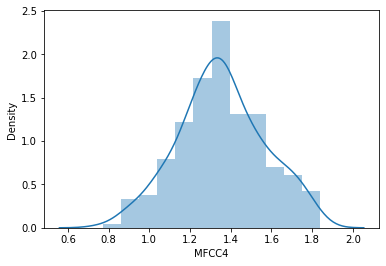

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


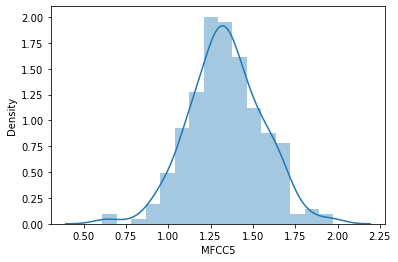

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


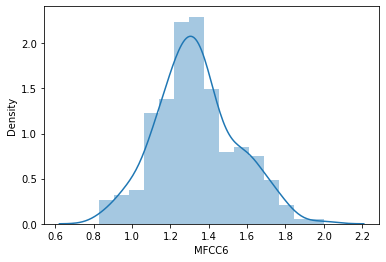

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


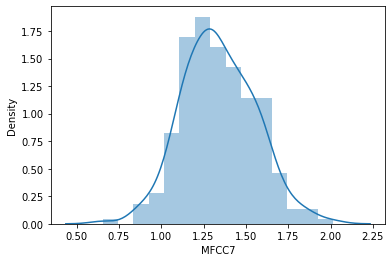

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


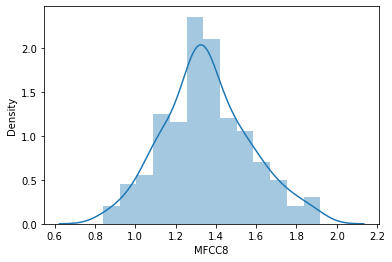

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


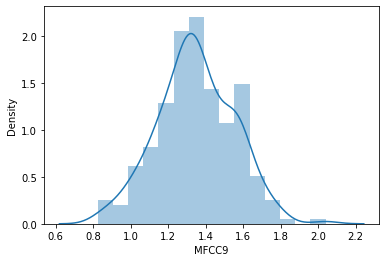

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


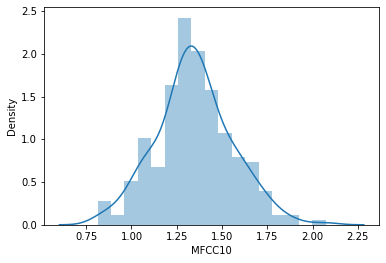

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


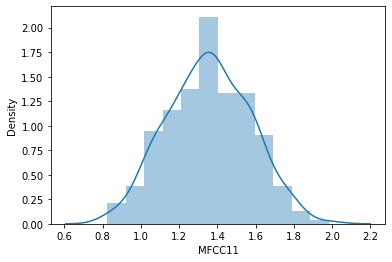

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


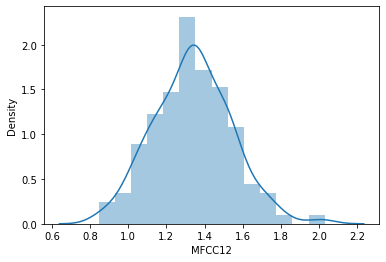

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


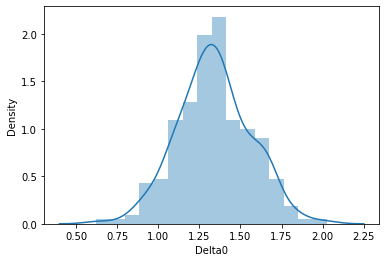

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


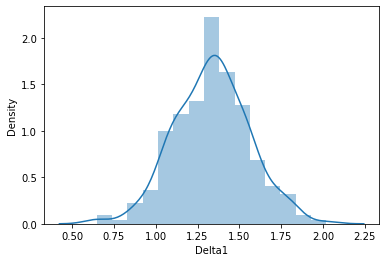

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


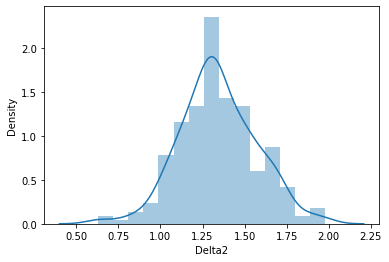

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


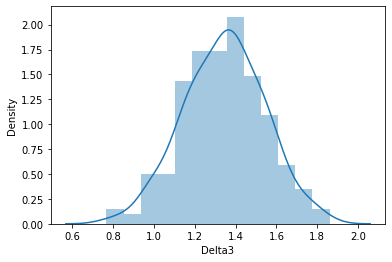

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


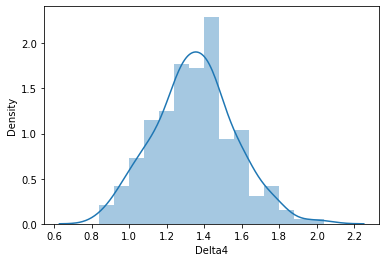

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


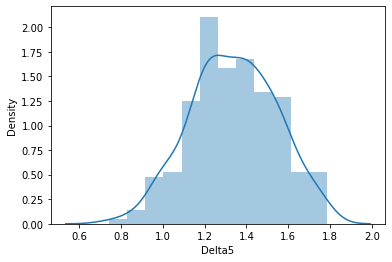

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


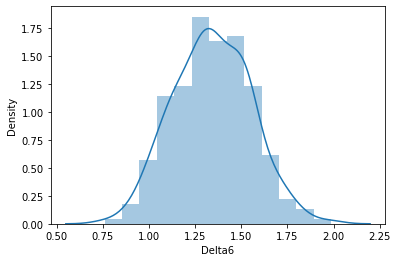

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


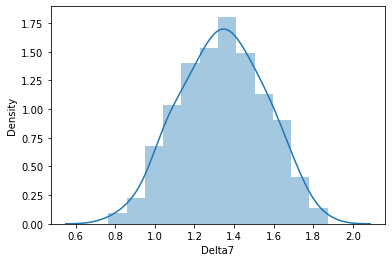

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


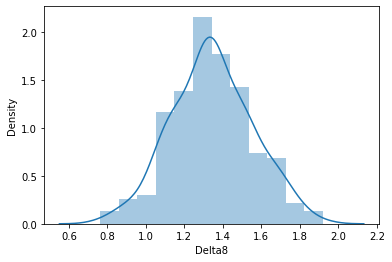

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


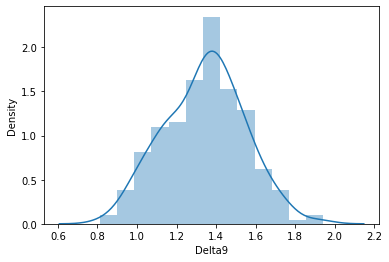

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


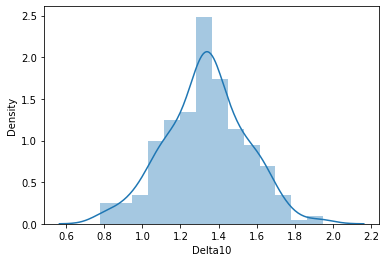

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


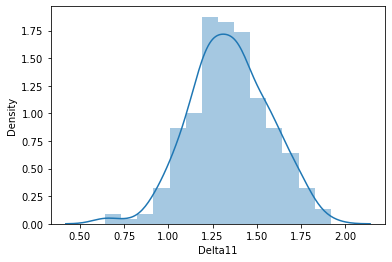

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


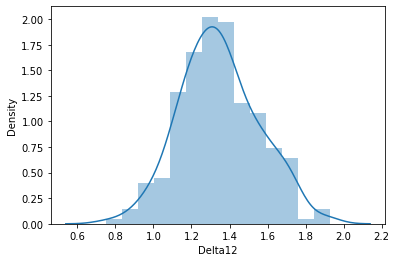

In [ ]:
def distribution_plt(attr):
    sns.distplot(df[attr])
    plt.show()
for i in range(1,len(df.columns)):
    distribution_plt(df.columns[i])

#### Checking for outliers using box plots:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


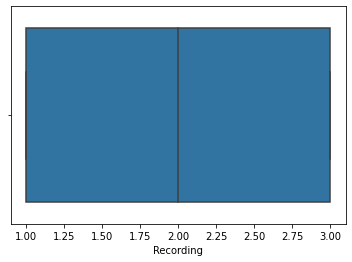

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


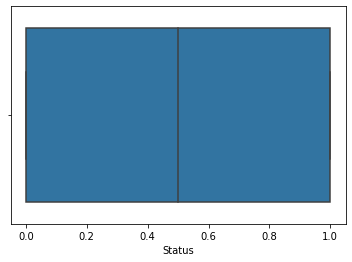

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


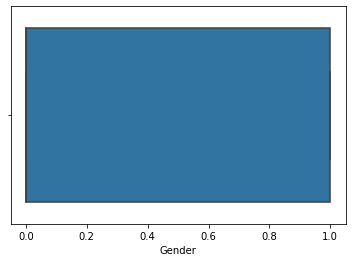

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


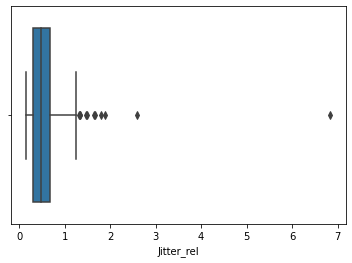

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


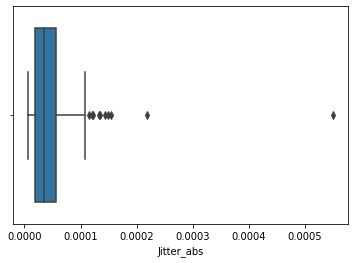

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


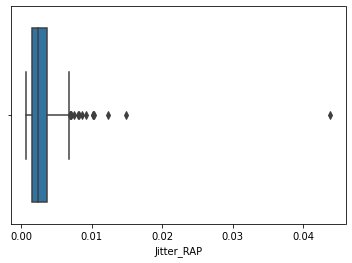

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


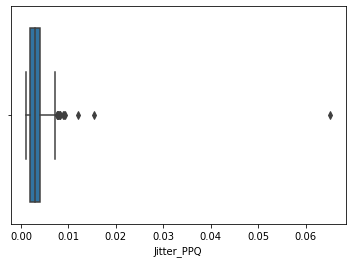

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


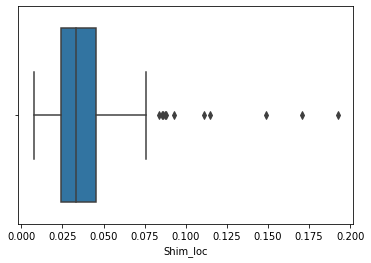

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


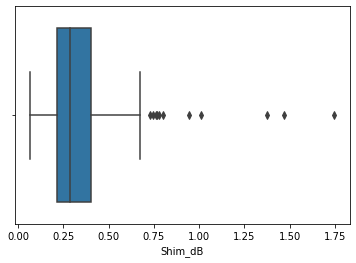

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


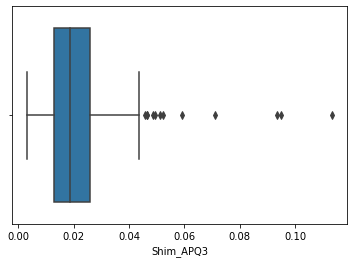

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


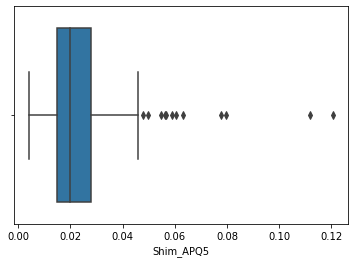

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


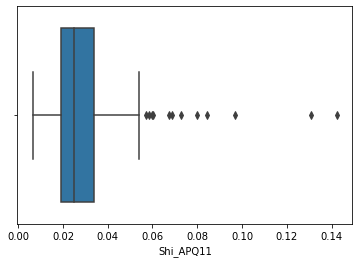

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


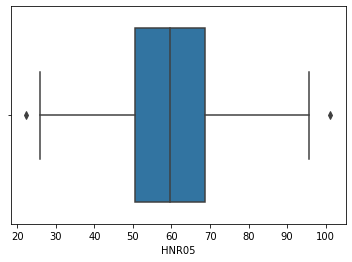

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


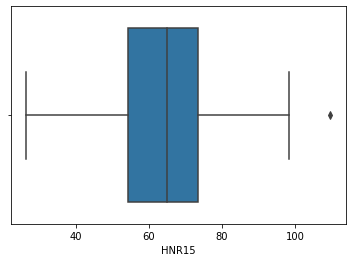

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


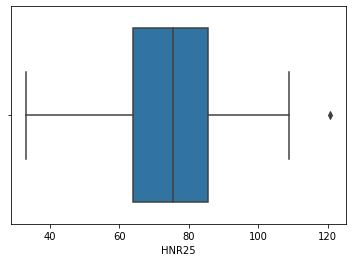

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


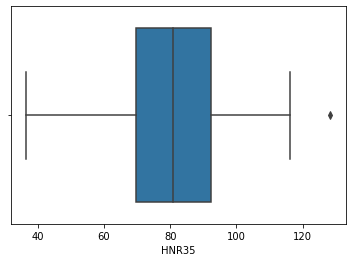

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


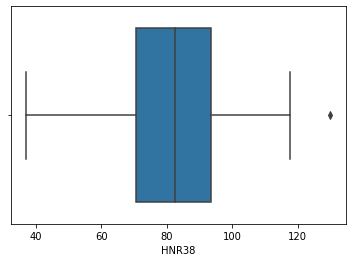

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


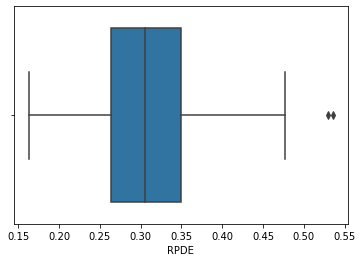

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


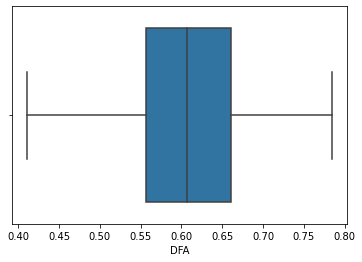

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


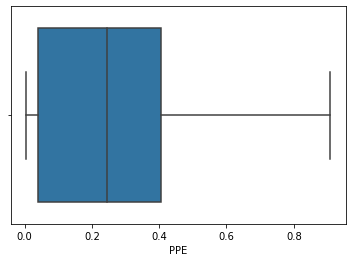

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


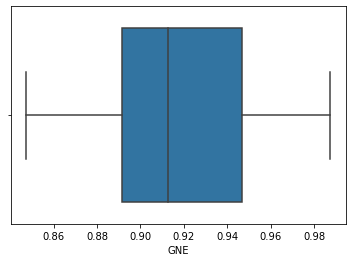

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


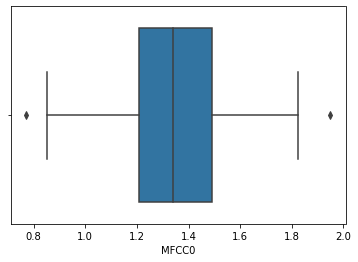

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


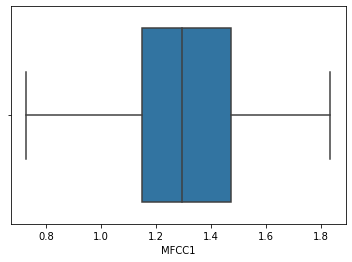

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


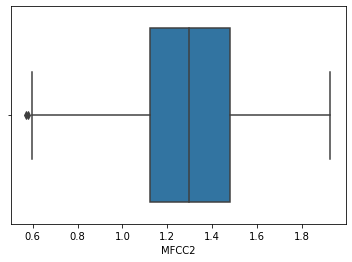

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


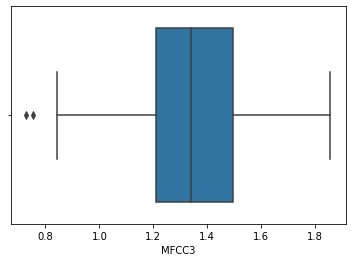

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


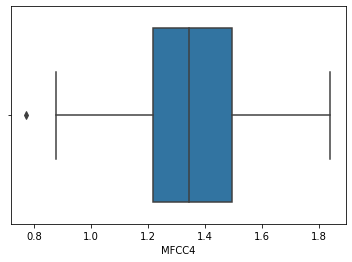

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


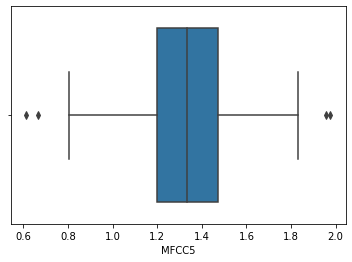

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


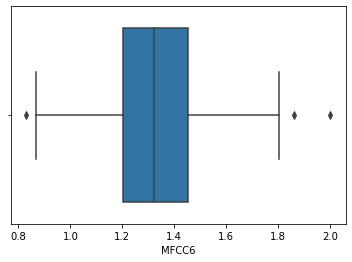

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


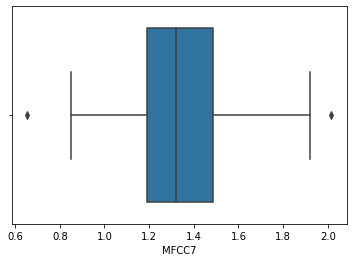

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


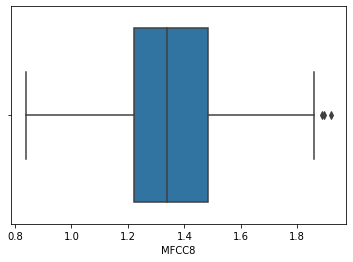

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


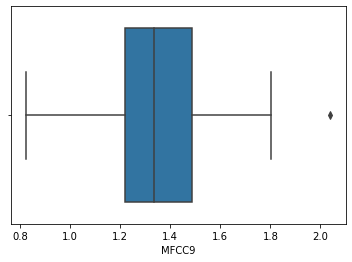

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


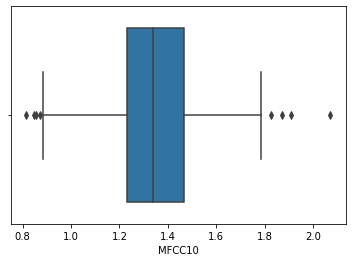

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


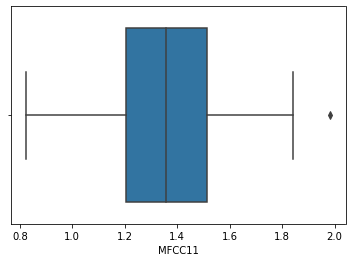

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


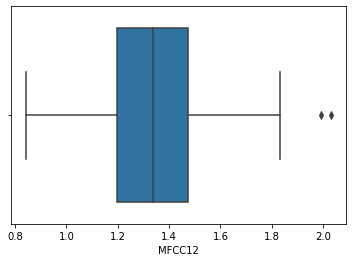

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


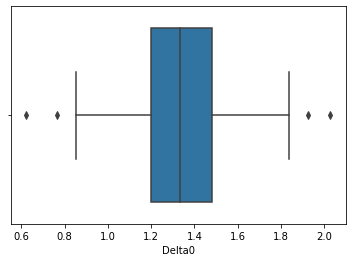

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


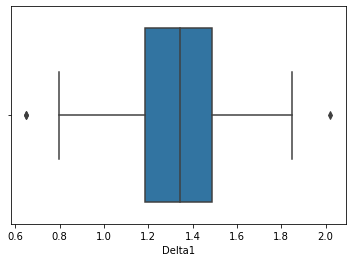

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


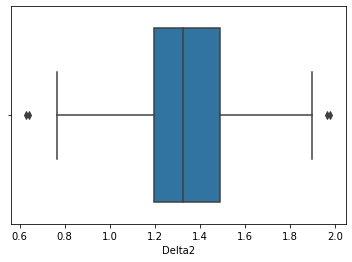

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


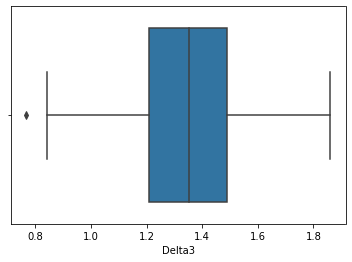

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


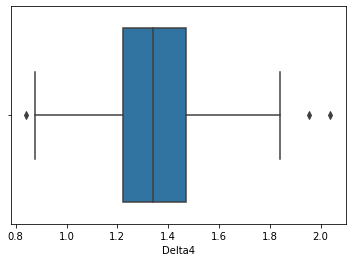

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


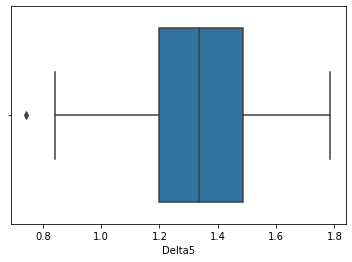

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


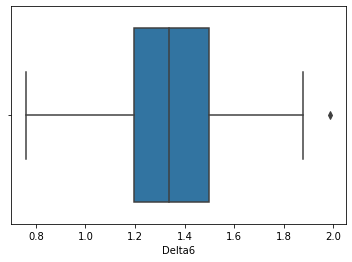

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


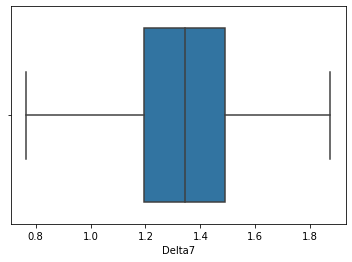

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


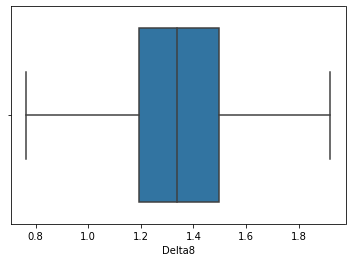

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


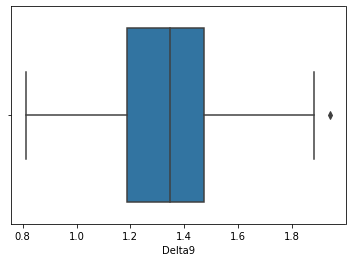

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


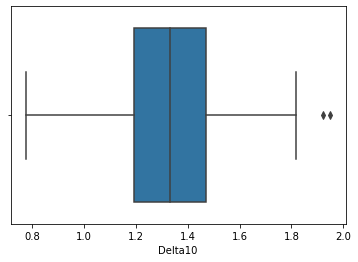

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


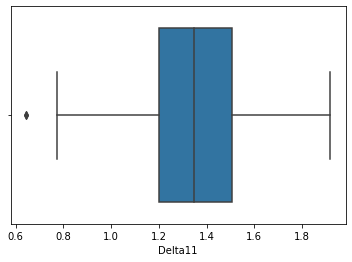

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


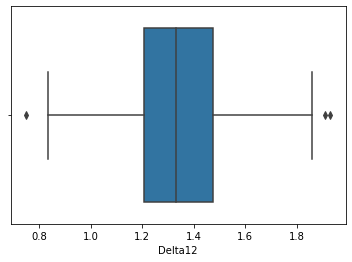

In [ ]:
def box_plt(attr):
    sns.boxplot(df[attr])
    plt.show()
for i in range(1,len(df.columns)):
    box_plt(df.columns[i])

#### Checking the correlation between different variables using heat-map:

<AxesSubplot:>

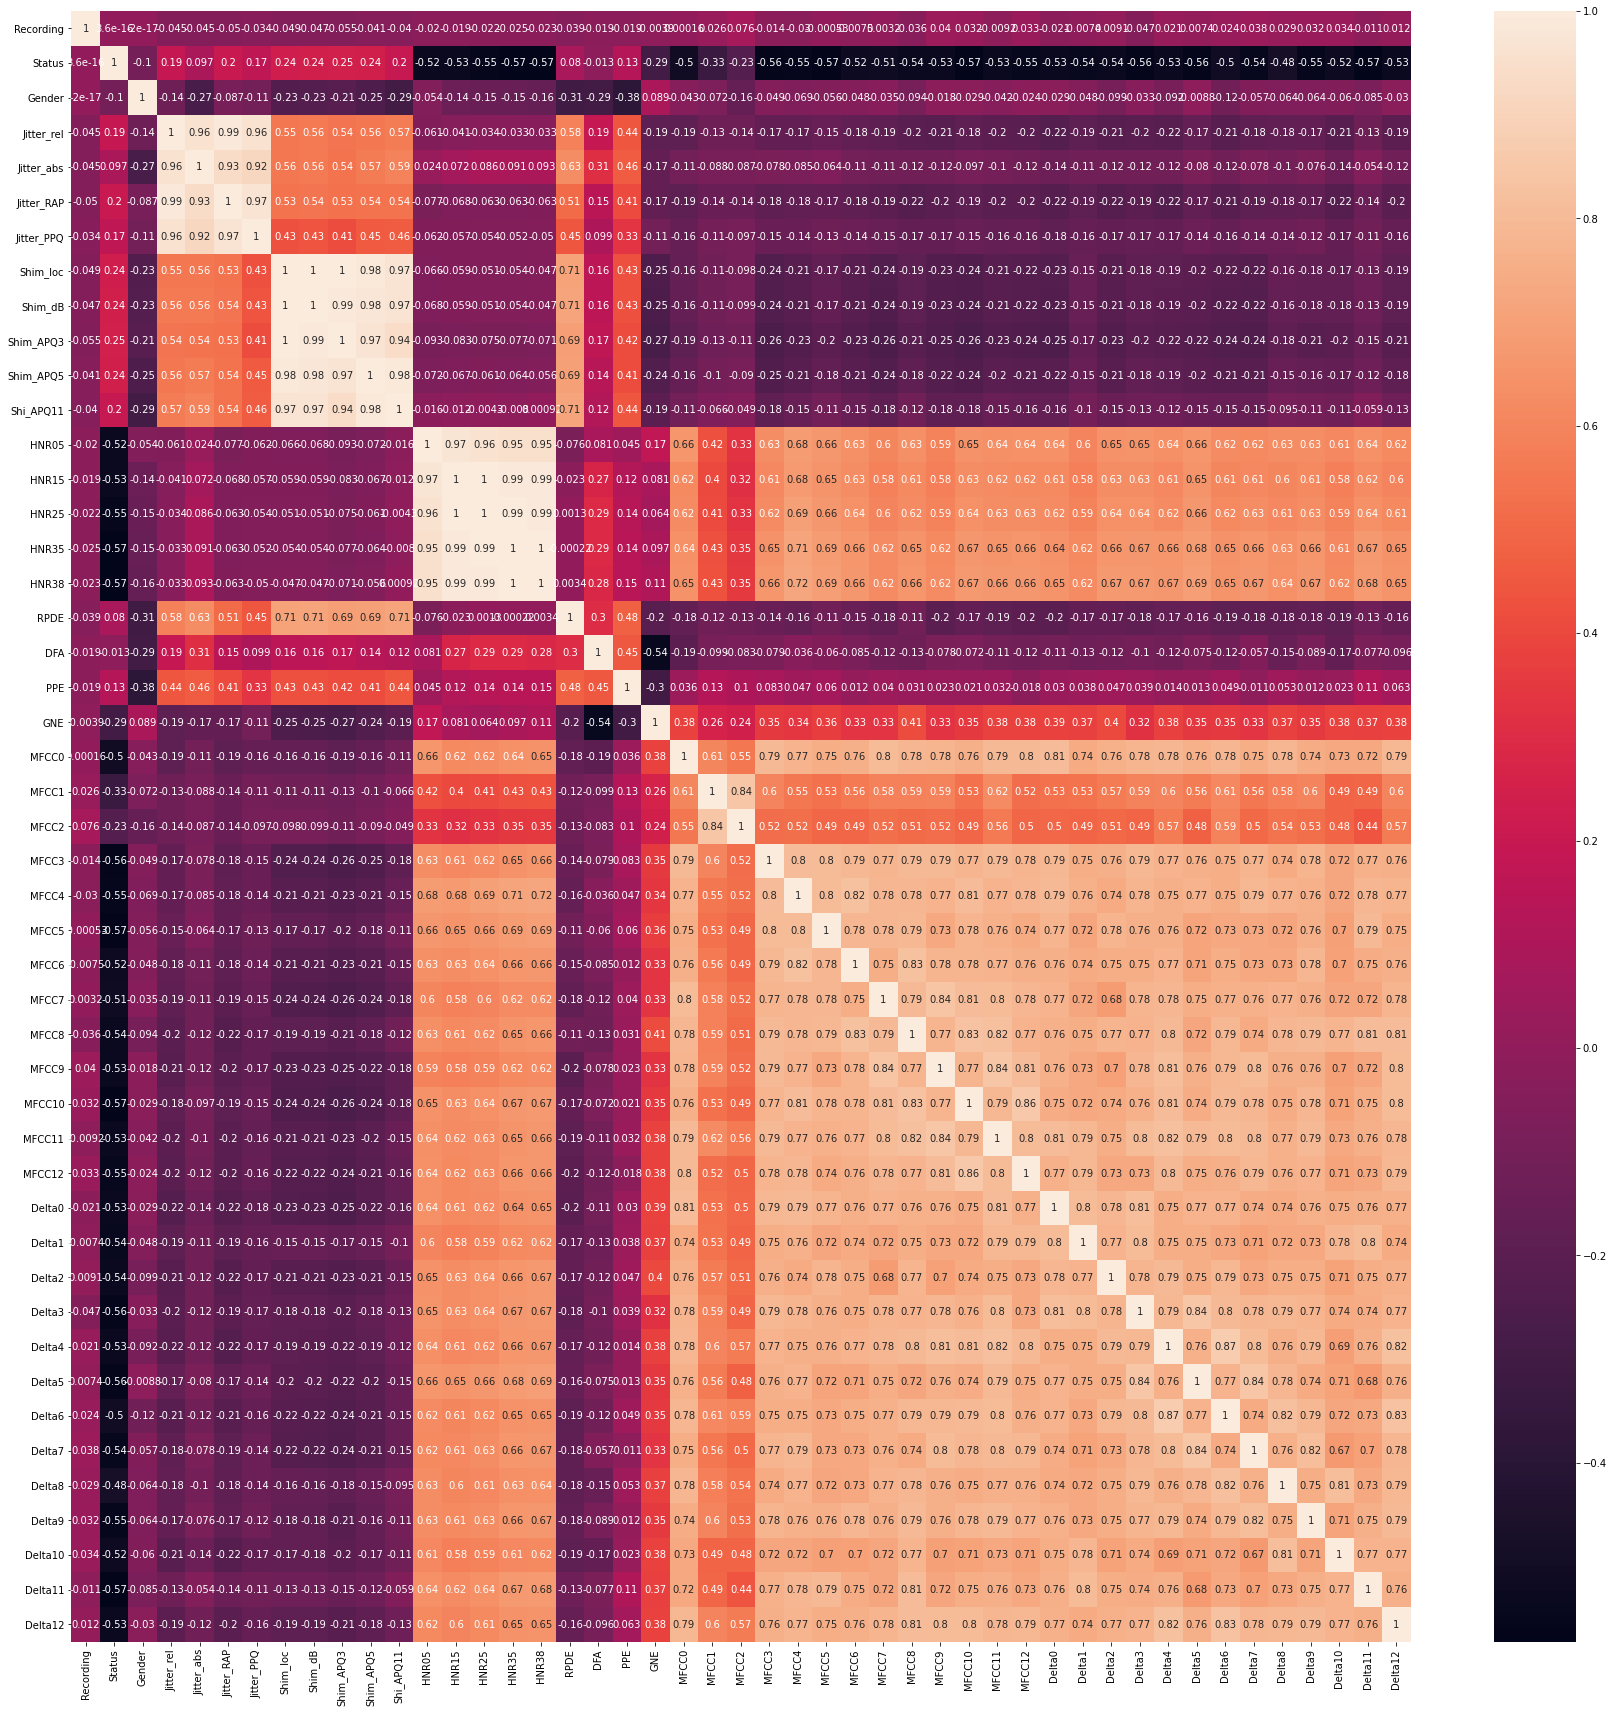

In [ ]:
plt.figure(figsize = (30,30))
co_re = df.corr()
sns.heatmap(co_re, annot = True)

#### Analysis using sweetviz

In [ ]:
report_1 = sweetviz.compare_intra(df, df["Gender"] == 0, ["Male", "Female"], 'Status')
report_1.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Generating synthetic data

#### 1. Gaussian Copula 

The sdv.tabular.GaussianCopula model is based on <b>copula functions</b>.
In mathematical terms, a copula is a distribution over the unit cube [0,1]^d which is constructed from a multivariate normal distribution over R^d by using the probability integral transform. 

In [ ]:
from sdv.tabular import GaussianCopula
model_Gaussian= GaussianCopula()
model_Gaussian.fit(df)
df_gc= model_Gaussian.sample(5000)

In [ ]:
df_gc.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,PARK-25,2,1,0,0.787376,0.000045,0.004457,0.006804,0.060453,0.504122,...,1.510343,1.371496,1.405242,1.422815,1.389876,1.355652,1.367538,1.306004,1.501110,1.430039
1,PARK-06,2,1,0,1.356952,0.000045,0.005268,0.009093,0.044511,0.406728,...,1.023869,0.954249,1.257329,0.900434,1.305676,1.012784,0.904758,1.173548,1.104012,0.895351
2,CONT-22,2,0,1,0.712573,0.000044,0.005110,0.005805,0.043585,0.361679,...,1.280589,1.463399,1.332550,1.381185,1.482621,1.204927,1.263213,1.278139,1.387785,1.372435
3,PARK-29,1,1,1,0.473174,0.000044,0.002792,0.003924,0.019245,0.161346,...,1.331089,1.220882,1.191828,1.381003,1.071129,1.255173,1.263498,1.490897,1.623330,1.242524
4,PARK-23,2,1,1,0.186585,0.000044,0.000883,0.001414,0.021512,0.181176,...,1.259572,1.241845,1.282063,1.176407,1.244194,1.223163,1.171413,1.142249,1.057740,1.235791


In [ ]:
df_gc.to_csv('Gaussian_copula.csv')

In [ ]:
from sdv.evaluation import evaluate
evaluate(df_gc, df)

0.6605126791826635

The evaluate function applies a collection of pre-configured metric functions and returns the average of the scores that the data obtained on each one of them.

##### Comparing the datasets (Gaussian Copula) with the original 240 rows-dataset

In [ ]:
report_2 = sweetviz.compare_intra(df2_syn, df2_syn["Gender"] == 0, ["Male", "Female"], 'Status')
report_2.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
comp_report = sweetviz.compare([df, "Original Data"], [df2_syn, "Synthetic Data"], "Status")
comp_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### Feature selection

Procedure to be followed:

1. Feature selection using algorithms like MRMR and chi square test
2. Manual selection by analyzing the correlations (heatmap) and results obtained from (1)

###### MRMR
Ranking all the features using the minimal-optimal feature selection algorithm. This algorithm ranks the features based on their mutual information and correlation.

In [ ]:
from mrmr import mrmr_classif
x = df_gc.drop(["ID","Recording","Status"],axis = 1)
y = df_gc['Status']
mrmr_features = mrmr_classif(X=x, y=y, K=25)
mrmr_features

100%|██████████| 25/25 [00:01<00:00, 12.92it/s]


['Delta3',
 'PPE',
 'MFCC10',
 'HNR35',
 'MFCC5',
 'Delta5',
 'Delta11',
 'HNR38',
 'MFCC3',
 'MFCC4',
 'Delta1',
 'HNR25',
 'MFCC11',
 'Delta2',
 'Delta9',
 'Delta7',
 'MFCC9',
 'MFCC6',
 'HNR15',
 'MFCC12',
 'Delta0',
 'MFCC8',
 'Delta4',
 'HNR05',
 'Delta10']

###### Chi-square test 
Chi-square is a statistical test used to examine the differences between categorical variables from a random sample in order to judge goodness of fit between expected and observed results.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_kbest_features = chi2(x,y)
pvalues = pd.Series(X_kbest_features[1], index = x.columns)
pvalues.sort_values(ascending=False, inplace=True)

In [ ]:
pvalues

Jitter_abs     9.999371e-01
DFA            9.539933e-01
GNE            8.278364e-01
Jitter_RAP     7.665375e-01
Jitter_PPQ     6.762659e-01
RPDE           5.843035e-01
Shi_APQ11      4.229944e-01
Shim_APQ3      4.068249e-01
Shim_APQ5      3.949548e-01
Shim_loc       2.170664e-01
PPE            1.112092e-01
MFCC2          1.059924e-01
MFCC1          9.783844e-03
Gender         9.052597e-03
Delta8         6.532828e-04
Delta10        5.763146e-04
Delta12        4.655885e-04
MFCC0          4.653704e-04
Delta6         4.179529e-04
MFCC7          3.942664e-04
MFCC9          3.570337e-04
Delta9         2.506083e-04
Delta5         2.261139e-04
MFCC12         2.185765e-04
Delta4         2.067195e-04
Delta3         1.974633e-04
MFCC4          1.937713e-04
MFCC6          1.825101e-04
Delta7         1.707340e-04
Shim_dB        1.567359e-04
MFCC8          1.413388e-04
MFCC11         1.221508e-04
MFCC3          1.221198e-04
Delta0         1.103993e-04
Delta11        9.343517e-05
Delta1         9.254

###### Manual selection 
1. Using PCA to reduce the dimensionality of all the MFCC features
2. Selecting the features by analyzing the correlations

In [ ]:
def feature_select(df):
  df_mfcc = df[['MFCC0', 'MFCC1', 'MFCC2', 'MFCC3','MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10','MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4','Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11','Delta12']]
  scaler = StandardScaler()
  scaler.fit_transform(df_mfcc) 
  n_components = 10
  pca = PCA(n_components)
  df_mfcc_pca = pca.fit_transform(df_mfcc)
  df_mfcc_pca = pd.DataFrame(df_mfcc_pca)
  df_mfcc_pca.rename( columns = {0:'pca1',1:'pca2',2:'pca3',3:'pca4',4:'pca5',5:'pca6',6:'pca7',7:'pca8',8:'pca9',9:'pca10'},inplace=True)
  df_temp = df.drop(['MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10','MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11', 'Delta12','HNR05', 'HNR15', 'HNR25', 'HNR38'],axis=1)
  df_return = pd.concat([df_temp,df_mfcc_pca],axis=1)
  df_return = df_return.drop(['Jitter_rel', 'Jitter_abs', 'Shim_loc', 'Shim_APQ3', 'Shi_APQ11'],axis=1)
  return df_return

In [ ]:
df_gc = feature_select(df_gc)
df_gc.head()

,ID,Recording,Status,Gender,Jitter_RAP,Jitter_PPQ,Shim_dB,Shim_APQ5,HNR35,RPDE,...,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,PARK-25,2,1,0,0.004457,0.006804,0.504122,0.038169,86.110471,0.380442,...,0.445226,0.282973,0.295236,-0.077740,-0.100096,-0.057444,0.049459,-0.072621,-0.115828,-0.112640
1,PARK-06,2,1,0,0.005268,0.009093,0.406728,0.024934,56.039496,0.425866,...,-1.590066,0.195315,-0.196002,0.028622,-0.257863,-0.110962,-0.173251,0.341496,0.018162,0.114616
2,CONT-22,2,0,1,0.005110,0.005805,0.361679,0.024027,81.574329,0.311706,...,0.030225,0.375687,0.046917,-0.161678,-0.192286,-0.015354,-0.009483,0.020334,-0.016443,0.028527
3,PARK-29,1,1,1,0.002792,0.003924,0.161346,0.016289,78.142995,0.244308,...,-0.354738,0.530576,0.027342,0.350313,-0.009770,0.159281,0.047857,-0.013329,0.002050,-0.067090
4,PARK-23,2,1,1,0.000883,0.001414,0.181176,0.015199,65.737416,0.209136,...,-0.647410,-0.162917,-0.179288,-0.127702,-0.030041,0.097984,-0.167111,-0.117537,-0.089772,-0.115612


<AxesSubplot:>

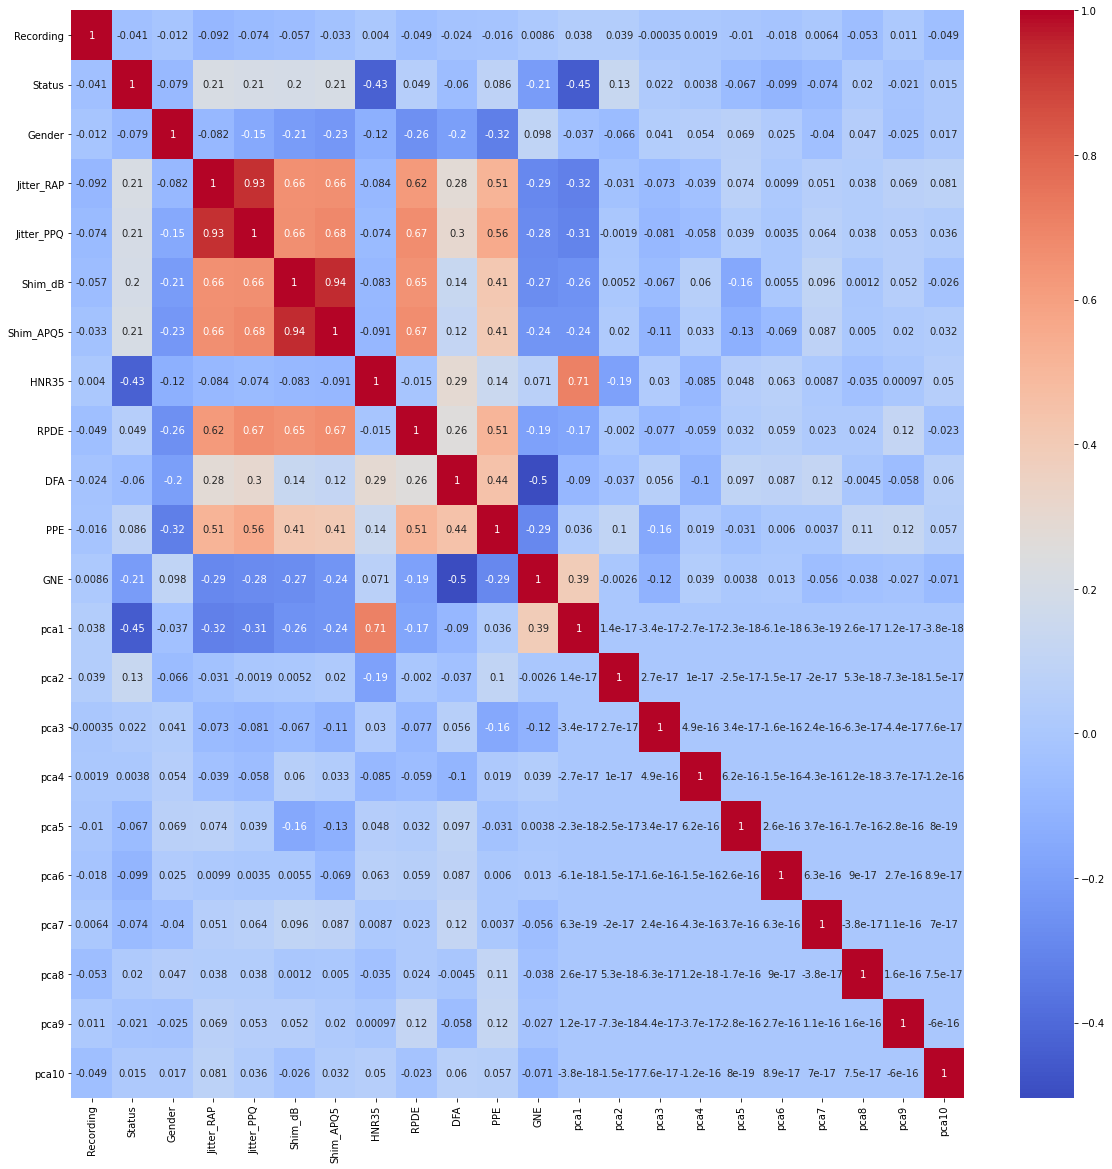

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_gc.corr(),cbar=True,annot=True,cmap='coolwarm')

The final dataset to be trained on has been reduced to 23 columns now post feature selection and reduction.

#### CTGAN, Copula GAN and TVAE to generate synthetic data

In [ ]:
from sdv.tabular import CTGAN
from sdv.tabular import CopulaGAN
from sdv.tabular import TVAE

model_ctgan = CTGAN()
model_copgan= CopulaGAN()
model_tvae= TVAE()

model_ctgan.fit(df)
model_copgan.fit(df)
model_tvae.fit(df)

In [ ]:
df_ctgan = model_ctgan.sample(num_rows=5000)
df_copgan = model_copgan.sample(num_rows=5000)
df_tvae= model_tvae.sample(num_rows=5000)

In [ ]:
print('CTGAN:')
evaluate(df_ctgan, df)

CTGAN:


0.38396108754316594

In [ ]:
print('Copula GAN:')
evaluate(df_copgan, df)

Copula GAN:


0.3761759312832603

In [ ]:
print('TVAE:')
evaluate(df_tvae, df)

TVAE:


0.6278341755108625

In [ ]:
df_ctgan = pd.read_csv('CTGAN.csv')
df_copgan = pd.read_csv('CopulaGAN.csv')
df_tvae = pd.read_csv('TVAE.csv')

In [ ]:
df_ctgan = feature_select(df_ctgan)
df_copgan = feature_select(df_copgan)
df_tvae = feature_select(df_tvae)

### AUTO_ML based training

<b>  Tree-Based Pipeline Optimization Tool (TPOT) </b> - automates the building of ML pipelines by combining a flexible expression tree representation of pipelines with stochastic search algorithms such as genetic programming. TPOT makes use of the Python-based scikit-learn library as its ML menu.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tpot import TPOTClassifier
def tpot_train(df2):
  X = df2.drop(['ID','Recording','Status'],axis=1)
  Y = df2['Status']
  cv = StratifiedKFold(n_splits=10)
  model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1) 
  model.fit(X, Y)
  print(model.fitted_pipeline_)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
  print(model.score(X_test, y_test))
  return model

def plot_roc_curve(fpr, tpr, label=None):
    #The ROC curve, modified from Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

#### Gaussian Copula

In [ ]:
mod_gc = tpot_train(df_gc)
mod_gc.export('tpot_gc.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.748

Generation 2 - Current best internal CV score: 0.748

Generation 3 - Current best internal CV score: 0.748

Generation 4 - Current best internal CV score: 0.748

Generation 5 - Current best internal CV score: 0.748

Best pipeline: MLPClassifier(FastICA(input_matrix, tol=0.15000000000000002), alpha=0.001, learning_rate_init=0.001)
Pipeline(steps=[('fastica', FastICA(random_state=1, tol=0.15000000000000002)),
                ('mlpclassifier', MLPClassifier(alpha=0.001, random_state=1))])
0.772


In [ ]:
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

tpot_data = df_gc
features = tpot_data.drop(['ID','Recording','Status'], axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Status'], random_state=1)
            
# Average CV score on the training set was: 0.748
gc_pipeline = make_pipeline(
    FastICA(tol=0.15000000000000002),
    MLPClassifier(alpha=0.001, learning_rate_init=0.001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(gc_pipeline.steps, 'random_state', 1)

gc_pipeline.fit(training_features, training_target)
results = gc_pipeline.predict(testing_features)

In [ ]:
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))

[[486 147]
 [180 437]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       633
           1       0.75      0.71      0.73       617

    accuracy                           0.74      1250
   macro avg       0.74      0.74      0.74      1250
weighted avg       0.74      0.74      0.74      1250



#### CTGAN

In [ ]:
mod_ctgan = tpot_train(df_ctgan)
mod_ctgan.export('tpot_ctgan.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6472

Generation 2 - Current best internal CV score: 0.6472

Generation 3 - Current best internal CV score: 0.6472

Generation 4 - Current best internal CV score: 0.6476

Generation 5 - Current best internal CV score: 0.6476

Best pipeline: LinearSVC(ZeroCount(input_matrix), C=10.0, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05)
Pipeline(steps=[('zerocount', ZeroCount()),
                ('linearsvc',
                 LinearSVC(C=10.0, dual=False, penalty='l1', random_state=1,
                           tol=1e-05))])
0.633


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from tpot.builtins import ZeroCount
from tpot.export_utils import set_param_recursive

tpot_data = df_ctgan.drop(['Unnamed: 0'],axis=1, inplace=True)
features = tpot_data.drop(['ID','Recording','Status'], axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Status'], random_state=1)

# Average CV score on the training set was: 0.6476
ctgan_pipeline = make_pipeline(
    ZeroCount(),
    LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l1", tol=1e-05)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(ctgan_pipeline.steps, 'random_state', 1)

ctgan_pipeline.fit(training_features, training_target)
results = ctgan_pipeline.predict(testing_features)

KeyError: ignored

In [ ]:
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))

[[281 278]
 [181 510]]
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       559
           1       0.65      0.74      0.69       691

    accuracy                           0.63      1250
   macro avg       0.63      0.62      0.62      1250
weighted avg       0.63      0.63      0.63      1250



#### Copula GAN

In [ ]:
mod_copgan = tpot_train(df_copgan)
mod_copgan.export('tpot_copgan.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5292

Generation 2 - Current best internal CV score: 0.5296000000000001

Generation 3 - Current best internal CV score: 0.5332000000000001

Generation 4 - Current best internal CV score: 0.5332000000000001

Generation 5 - Current best internal CV score: 0.5346

Best pipeline: GaussianNB(RFE(input_matrix, criterion=gini, max_features=0.7000000000000001, n_estimators=100, step=0.5))
Pipeline(steps=[('rfe',
                 RFE(estimator=ExtraTreesClassifier(max_features=0.7000000000000001,
                                                    random_state=1),
                     step=0.5)),
                ('gaussiannb', GaussianNB())])
0.537


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

tpot_data = df_copgan.drop(['Unnamed: 0'],axis=1, inplace=True)
features = tpot_data.drop(['ID','Recording','Status'], axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Status'], random_state=1)

# Average CV score on the training set was: 0.5346
exported_pipeline = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.7000000000000001, n_estimators=100), step=0.5),
    GaussianNB()
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [ ]:
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))

#### TVAE

In [ ]:
mod_tvae = tpot_train(df_tvae)
mod_tvae.export('tpot_tvae.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.908

Generation 2 - Current best internal CV score: 0.9086000000000001

Generation 3 - Current best internal CV score: 0.9086000000000001

Generation 4 - Current best internal CV score: 0.9092

Generation 5 - Current best internal CV score: 0.9092

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=8, min_samples_split=9, n_estimators=100)
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        max_features=0.9500000000000001,
                                        min_samples_leaf=8, min_samples_split=9,
                                        random_state=1))])
0.963


In [ ]:
from sklearn.ensemble import RandomForestClassifier

tpot_data = df_tvae.drop(['Unnamed: 0'],axis=1, inplace=True)
features = tpot_data.drop(['ID','Recording','Status'], axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Status'], random_state=1)

# Average CV score on the training set was: 0.9092
tvae_pipeline = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.9500000000000001, min_samples_leaf=8, min_samples_split=9, n_estimators=100)
# Fix random state in exported estimator
if hasattr(tvae_pipeline, 'random_state'):
    setattr(tvae_pipeline, 'random_state', 1)

tvae_pipeline.fit(training_features, training_target)
results = tvae_pipeline.predict(testing_features)

In [ ]:
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))

### CASE-1:Testing the model trained on synthetic data against the original dataset

In [ ]:
df = pd.read_csv('ReplicatedAcousticFeatures-ParkinsonDatabase.csv')
df_mfcc = df[['MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12']]
scaler = StandardScaler()
scaler.fit_transform(df_mfcc)
n_components = 10
pca_og = PCA(n_components)
df_mfcc_pca = pca_og.fit_transform(df_mfcc)
df_mfcc_pca = pd.DataFrame(df_mfcc_pca)
df_mfcc_pca.rename( columns = {0:'pca1',1:'pca2',2:'pca3',3:'pca4',4:'pca5',5:'pca6',6:'pca7',7:'pca8',8:'pca9',9:'pca10'},inplace=True)
df_temp = df.drop(['MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12','HNR05', 'HNR15', 'HNR25', 'HNR38'],axis=1)
df_test = pd.concat([df_temp,df_mfcc_pca],axis=1)
df_test= df_test.drop(['Jitter_rel', 'Jitter_abs', 'Shim_loc', 'Shim_APQ3', 'Shi_APQ11'],axis=1)

##### Gaussian Copula based model

[[84 36]
 [64 56]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       120
           1       0.61      0.47      0.53       120

    accuracy                           0.58       240
   macro avg       0.59      0.58      0.58       240
weighted avg       0.59      0.58      0.58       240

AUC: 0.5833333333333333


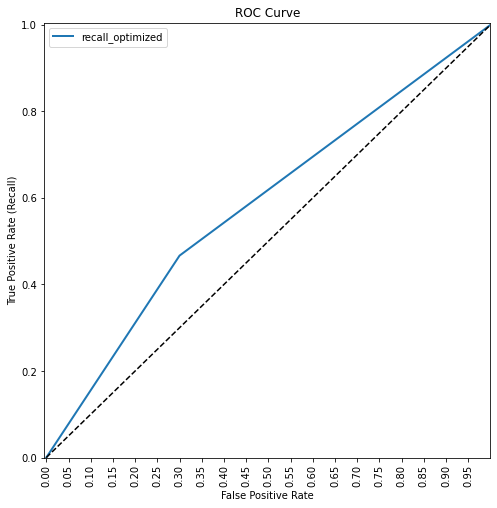

In [ ]:
results1 = gc_pipeline.predict(df_test.drop(['ID','Recording','Status'], axis=1))
print(confusion_matrix(df_test['Status'], results1))
print(classification_report(df_test['Status'], results1))
fpr, tpr, auc_thresholds = roc_curve(df_test['Status'], results1)
print('AUC:', auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

##### CTGAN based model

In [ ]:
results2 = ctgan_pipeline.predict(df_test.drop(['ID','Recording','Status'], axis=1))
print(confusion_matrix(df_test['Status'], results2))
print(classification_report(df_test['Status'], results2))
fpr, tpr, auc_thresholds = roc_curve(df_test['Status'], results2)
print('AUC:', auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

ValueError: ignored

##### Copula GAN based model

In [ ]:
results3 = copgan_pipeline.predict(df_test.drop(['ID','Recording','Status'], axis=1))
print(confusion_matrix(df_test['Status'], results3))
print(classification_report(df_test['Status'], results3))
fpr, tpr, auc_thresholds = roc_curve(df_test['Status'], results3)
print('AUC:', auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

##### TVAE based model

In [ ]:
results4 = tvae_pipeline.predict(df_test.drop(['ID','Recording','Status'], axis=1))
print(confusion_matrix(df_test['Status'], results4))
print(classification_report(df_test['Status'], results4))
fpr, tpr, auc_thresholds = roc_curve(df_test['Status'], results4)
print('AUC:', auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

The following 2 cases were trained on Gaussian Copula based model:

### CASE 2: Training on real data and testing on synthetic

In [ ]:
X2 = df_test.drop(['ID','Recording','Status'],axis=1)
Y2 = df_test['Status']
cv = StratifiedKFold(n_splits=10)

model_2 = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

model_2.fit(X2, Y2)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8125

Generation 2 - Current best internal CV score: 0.8125

Generation 3 - Current best internal CV score: 0.8125

Generation 4 - Current best internal CV score: 0.825

Generation 5 - Current best internal CV score: 0.825

Best pipeline: ExtraTreesClassifier(SGDClassifier(input_matrix, alpha=0.001, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate=constant, loss=hinge, penalty=elasticnet, power_t=0.1), bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=11, min_samples_split=3, n_estimators=100)


TPOTClassifier(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [ ]:
model_2.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=SGDClassifier(alpha=0.001,
                                                           eta0=1.0,
                                                           l1_ratio=0.5,
                                                           learning_rate='constant',
                                                           penalty='elasticnet',
                                                           power_t=0.1,
                                                           random_state=1))),
                ('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, max_features=0.4,
                                      min_samples_leaf=11, min_samples_split=3,
                                      random_state=1))])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.20)

In [ ]:
print(model_2.score(X_test2, y_test2))

0.8333333333333334


In [ ]:
model_2.export('tpot_240_pipeline.py')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data2 = df_test
features2 = tpot_data2.drop(['ID','Recording','Status'], axis=1)
training_features2, testing_features2, training_target2, testing_target2 = \
            train_test_split(features2, tpot_data2['Status'], random_state=1)

# Average CV score on the training set was: 1.0
exported_pipeline2 = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.001, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=0.1)),
    ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.4, min_samples_leaf=11, min_samples_split=3, n_estimators=100)
)
# Fix random state in exported estimator
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline2.fit(training_features2, training_target2)
results2 = exported_pipeline2.predict(testing_features2)


In [ ]:
print(confusion_matrix(testing_target2, results2))
print(classification_report(testing_target2, results2))

[[32  4]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



<b>Testing on synthetic data:</b>

In [ ]:
results2B = exported_pipeline2.predict(df2.drop(['ID','Recording','Status'], axis=1))

In [ ]:
print(confusion_matrix(df2['Status'], results2B))
print(classification_report(df2['Status'], results2B))

[[791 457]
 [271 981]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1248
           1       0.68      0.78      0.73      1252

    accuracy                           0.71      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.71      0.71      0.71      2500



### CASE 3: Combining the real and synthetic data

In [ ]:
df_combined = pd.concat([df_test,df2])
df_combined

,ID,Recording,Status,Gender,Jitter_RAP,Jitter_PPQ,Shim_dB,Shim_APQ5,HNR35,RPDE,DFA,PPE,GNE,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,CONT-01,1,0,1,0.001467,0.001673,0.263130,0.019660,77.626729,0.250433,0.599346,0.005397,0.900404,-0.110124,-0.010822,-0.003063,-0.206683,0.055496,-0.073054,-0.084689,-0.084139,0.046336,0.020272
1,CONT-01,2,0,1,0.001932,0.002245,0.202170,0.014097,79.989228,0.271445,0.581242,0.075617,0.887042,0.194963,0.025405,-0.026154,-0.059998,0.093982,-0.040940,-0.081076,-0.053358,0.005158,-0.006878
2,CONT-01,3,0,1,0.001353,0.001546,0.167100,0.012683,78.930502,0.203531,0.600759,0.005283,0.889399,-0.032811,0.005002,0.040987,-0.022835,0.060685,0.027364,0.054394,-0.040975,-0.009368,-0.009499
3,CONT-02,1,0,0,0.001105,0.001444,0.208920,0.015696,84.367682,0.261360,0.625216,0.030518,0.875984,-0.906045,-0.202928,0.037723,0.250877,0.320492,0.087248,0.301464,-0.008585,0.164216,0.069811
4,CONT-02,2,0,0,0.001073,0.001404,0.116070,0.008385,91.033967,0.222069,0.602493,0.035602,0.902206,-0.702805,-0.223608,0.002154,-0.202202,0.078287,-0.067076,0.093175,-0.131251,-0.077685,-0.270121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,PARK-08,2,1,0,0.002465,0.002278,0.417891,0.029469,47.824201,0.296024,0.422776,0.036301,0.945494,0.701229,-0.075912,0.096725,-0.052817,-0.013390,0.107617,-0.061986,0.283190,-0.107893,0.144487
2496,PARK-31,2,0,0,0.005368,0.008507,0.483125,0.027335,119.444676,0.327658,0.664279,0.455977,0.933941,-1.196793,0.163326,-0.033809,0.307532,0.101759,-0.141407,-0.050780,-0.149880,0.167463,-0.004158
2497,CONT-18,2,0,0,0.002795,0.003951,0.112484,0.012550,90.973032,0.266497,0.713253,0.181242,0.899087,-0.004033,0.111762,0.206720,-0.054857,-0.070523,0.248172,-0.171952,-0.042477,0.265474,0.048010
2498,PARK-01,2,0,1,0.002686,0.002976,0.369659,0.021977,70.292981,0.367665,0.629026,0.227667,0.916537,0.306433,0.147386,-0.124711,-0.062786,-0.109924,0.022324,0.010224,-0.065252,-0.041579,0.135216


In [ ]:
X3 = df_combined.drop(['ID','Recording','Status'],axis=1)
Y3 = df_combined['Status']
cv = StratifiedKFold(n_splits=10)

model_3 = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

model_3.fit(X3, Y3)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7437956204379562

Generation 2 - Current best internal CV score: 0.7445255474452555

Generation 3 - Current best internal CV score: 0.7445255474452555

Generation 4 - Current best internal CV score: 0.7445255474452555

Generation 5 - Current best internal CV score: 0.7463503649635037

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(CombineDFs(FastICA(input_matrix, tol=0.1), input_matrix), bootstrap=True, criterion=entropy, max_features=0.5, min_samples_leaf=14, min_samples_split=14, n_estimators=100), bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=8, min_samples_split=6, n_estimators=100)


TPOTClassifier(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [ ]:
model_3.fitted_pipeline_

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('fastica',
                                                 FastICA(random_state=1,
                                                         tol=0.1)),
                                                ('functiontransformer',
                                                 FunctionTransformer(func=<function copy at 0x7f3bbc875cb0>))])),
                ('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True,
                                                                  criterion='entropy',
                                                                  max_features=0.5,
                                                                  min_samples_leaf=14,
                                                                  min_samples_split=14,
                                                                  random_state=1))),
                ('extratreesc

In [ ]:
model_3.export('tpot_5240_pipeline.py')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data3 = df_combined
features3 = tpot_data3.drop(['ID','Recording','Status'], axis=1)
training_features3, testing_features3, training_target3, testing_target3 = \
            train_test_split(features3, tpot_data3['Status'], random_state=1)

# Average CV score on the training set was: 1.0
exported_pipeline3 = make_pipeline(
    make_union(
        FastICA(tol=0.1),
        FunctionTransformer(copy)
    ),
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.5, min_samples_leaf=14, min_samples_split=14, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.2, min_samples_leaf=8, min_samples_split=6, n_estimators=100)
)
# Fix random state in exported estimator
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline3.fit(training_features3, training_target3)
results3 = exported_pipeline3.predict(testing_features3)


In [ ]:
print(confusion_matrix(testing_target3, results3))
print(classification_report(testing_target3, results3))

[[256  74]
 [ 98 257]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       330
           1       0.78      0.72      0.75       355

    accuracy                           0.75       685
   macro avg       0.75      0.75      0.75       685
weighted avg       0.75      0.75      0.75       685

